In [1]:
import astropy.units as u
import glob 
from astropy.utils import data
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt 
from astropy.io import fits
import numpy as np
from astropy.wcs import WCS
from tqdm import tqdm
%matplotlib inline
import warnings; warnings.filterwarnings('ignore')
from astropy import constants as const
import matplotlib.pyplot as plt
from photutils.aperture import CircularAperture, EllipticalAperture
import photutils
from photutils import aperture_photometry
from photutils.isophote import Ellipse
from photutils.isophote import EllipseGeometry
from matplotlib.colors import LogNorm

plt.rc('axes', lw = 2)
plt.rc('font', family = 'serif')

In [2]:
filenames = glob.glob('./*jcmt*')
co12 = SpectralCube.read(filenames[0]).with_spectral_unit(u.km/u.s)
#co12 = co12.spectral_slab(-1.5 * u.km/u.s, 16 * u.km/u.s)
co12 = co12.spectral_slab(-0.7 * u.km/u.s, 20 * u.km/u.s)

In [3]:
co12_moment0 = np.asarray(co12.moment(order = 0).value) / 0.66
co12_moment1 = np.asarray(co12.moment(order = 1).value) 

# Question 2g

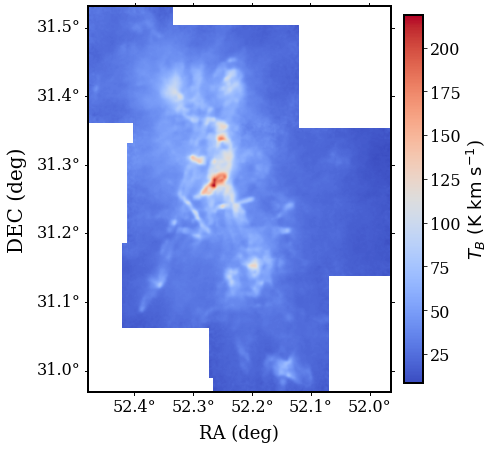

In [4]:
plt.figure(figsize = (24,10))
plt.subplots_adjust(wspace = 0.5)

## 12CO
ax = plt.subplot(131, projection=co12.wcs.celestial)
plt.imshow(co12_moment0, cmap = 'coolwarm')
cb = plt.colorbar(fraction=0.055, pad=0.04)
ax.set_xlabel('RA (deg)', fontsize = 18)
ax.set_ylabel('DEC (deg)', fontsize = 20)
cb.set_label(r'$T_B \ (\rm K \ km \ s^{-1}$)', fontsize = 18)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_fontsize(16)
for axc in ax.coords: axc.set_format_unit('deg', decimal = True) 
ax.tick_params(labelsize = 16)


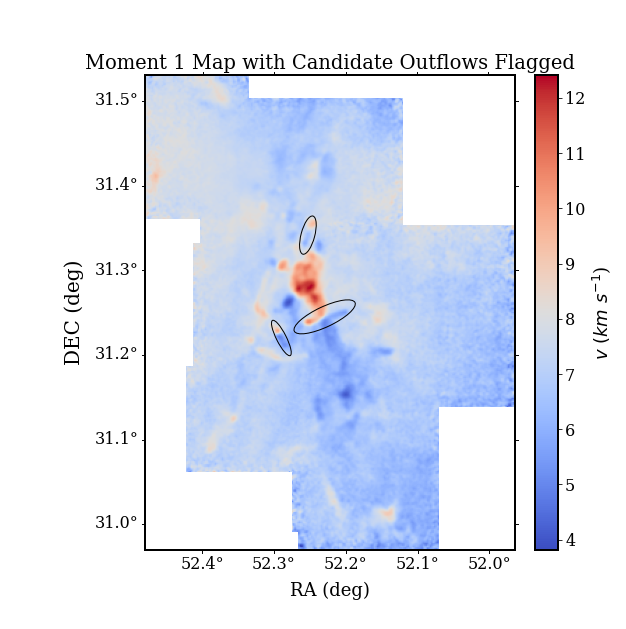

In [5]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(wspace = 0.5)

## 12CO
ax = plt.subplot(111, projection=co12.wcs.celestial)
plt.imshow(co12_moment1, cmap = 'coolwarm')
cb = plt.colorbar(fraction=0.055, pad=0.04)
ax.set_xlabel('RA (deg)', fontsize = 18)
ax.set_ylabel('DEC (deg)', fontsize = 20)
cb.set_label(r'$v \ ( km \ s^{-1}$)', fontsize = 18)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_fontsize(16)
for axc in ax.coords: axc.set_format_unit('deg', decimal = True) 
ax.tick_params(labelsize = 16)


ax.set_title('Moment 1 Map with Candidate Outflows Flagged', fontsize = 19.5)

#######################
geometry = EllipseGeometry(x0 = 128, y0= 165, sma= 24, eps=0.7,
                           pa= -155 * np.pi / 180.0)
ellipse = Ellipse(co12_moment1, geometry)
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,
                          geometry.sma * (1 - geometry.eps),
                          geometry.pa)
aper.plot(color='black', lw = 1)
########################################################
geometry = EllipseGeometry(x0 = 97, y0= 150, sma= 14, eps=0.75,
                           pa= 117 * np.pi / 180.0)
ellipse = Ellipse(co12_moment1, geometry)
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,
                          geometry.sma * (1 - geometry.eps),
                          geometry.pa)
aper.plot(color='black', lw = 1)
###########################################################
geometry = EllipseGeometry(x0 = 116, y0= 223, sma= 14, eps=0.65,
                           pa= 75  * np.pi / 180.0)
ellipse = Ellipse(co12_moment1, geometry)
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,
                          geometry.sma * (1 - geometry.eps),
                          geometry.pa)
aper.plot(color='black', lw = 1)
#################################################
plt.savefig('BipolarOutflows.pdf', bbox_inches = 'tight')

# Question 2b

In [14]:
co12_np = np.asarray(co12) / 0.66
co_12_max = np.max(co12_np, axis = 0)

In [15]:
Texmap = 5.5 / np.log(1 + (5.5)/(co_12_max + 0.82))

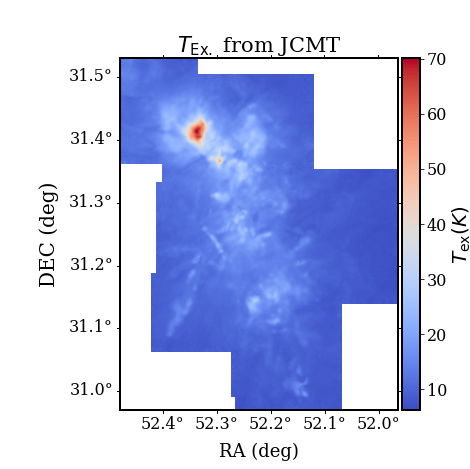

In [16]:
plt.figure(figsize = (7,7))
plt.subplots_adjust(wspace = 0.5)

ax = plt.subplot(111, projection=co12.wcs.celestial)
plt.imshow(Texmap, cmap = 'coolwarm')
cb = plt.colorbar(fraction=0.055, pad=0.01)
ax.set_xlabel('RA (deg)', fontsize = 18)
ax.set_ylabel('DEC (deg)', fontsize = 20)
cb.set_label(r'$T_{\rm ex} (K)$', fontsize = 20)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_fontsize(16)
for axc in ax.coords: axc.set_format_unit('deg', decimal = True) 
ax.tick_params(labelsize = 16)

ax.set_title(r'$T_{\rm Ex.}$ from JCMT', fontsize = 21)

plt.savefig('TexMap_JCMT.pdf', bbox_inches = 'tight')

In [17]:
np.nanmax(Texmap)

70.13527